# Марковская цепь

Материалы и датасеты для занятия можно найти в [репозитории](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4) GitHub или на [гугл-диске](https://drive.google.com/drive/folders/1Y1kXHasr5_hompZatPmdGaRkDYoxxqQ3?usp=sharing)

Пусть $E$ - некоторое дискретное (конечное или счётное) множество, которое называют пространством состояний.

**Примеры:**
- $E1=\{солнечно,пасмурно,дождь,снег\}$ - пространство погодных условий
- $E2=\{а,б,…,я\}$ - пространство кириллических букв
- $E3=ℕ=\{0,1,…,\}$ - пространство целых чисел (число студентов в классе)

Если система находится в состоянии $i \in E$ в момент времени $n$, то в момент времени $n+1$ она может перейти в состояние $j \in E$ с переходной вероятностью $p_{ij}$.

Например для кириллицы $p_{п,р}=0.278$  $p_{п,ы}=0.009$

# Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$
$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [120]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [121]:
with open('alice_en.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^a-z]','', text)

In [122]:
ENGLISH = 'abcdefghijklmnopqrstuvwxyz'
POS = {l: i for i, l in enumerate(ENGLISH)}

In [123]:
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))

In [124]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [125]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [126]:
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

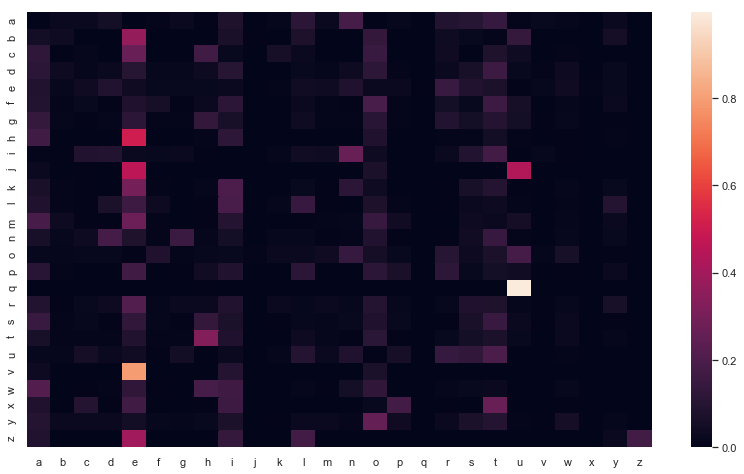

In [127]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

### Практика - постройте матрицу вероятности для русской версии книги

In [92]:
with open('alice_ru.txt', 'r', encoding='koi8-r') as f:
    text = f.read().lower()
ru_text = re.sub('[^а-я]','', text)

In [100]:
RUSS = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
RU_POS = {l: i for i, l in enumerate(RUSS)}

In [101]:
ru_probabilities = np.zeros((len(RUSS), len(RUSS)))

In [102]:
for cp, cn in zip(ru_text[:-1], ru_text[1:]):
    ru_probabilities[RU_POS[cp], RU_POS[cn]] += 1

In [103]:
ru_probabilities = (ru_probabilities / ru_probabilities.sum(axis=1)[:, None])

In [104]:
ru_df = pd.DataFrame(ru_probabilities, index=(c for c in RUSS), columns=(c for c in RUSS))

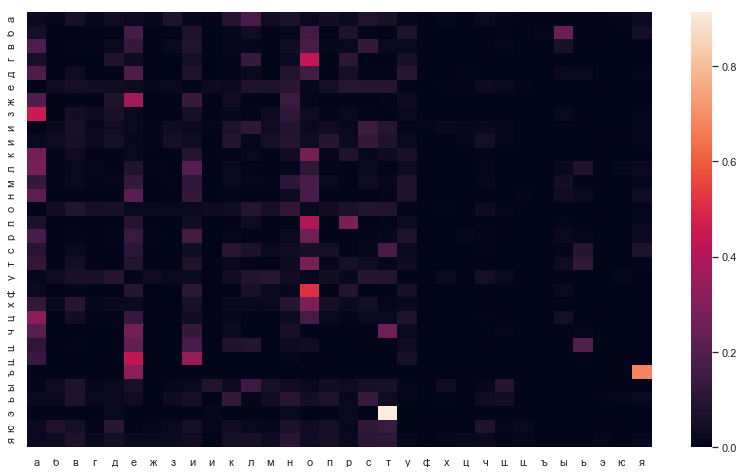

In [105]:
plt.figure(figsize=(14,8))
sns.heatmap(ru_df)
plt.show()

# Траектория в цепи

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос даст одна простая теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

In [128]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

5.348363016330027e-07


**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. Оказывается, что это не так уж и далеко от истины.

**Теорема.** Пусть $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. Тогда $P^{(n)}=P⋅P⋅…⋅P=P^n$

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"?

In [129]:
start = POS['h']
end = POS['y']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['h', c, 'y']), proba)

hay 0.00019786241179454468
hby 3.2498131357446945e-06
hcy 2.5963886570530186e-07
hdy 2.00246712505073e-06
hey 0.00041670464060019366
hfy 2.4496387427496224e-06
hgy 2.2022341052346015e-07
hhy 3.0694052582470812e-06
hky 1.0202901705244971e-07
hly 6.987940162352581e-06
hmy 4.054691865351508e-06
hny 1.0187698076726042e-06
hoy 2.0758961455728112e-05
hpy 2.095534994542692e-06
hry 2.9097918521227684e-05
hsy 2.6301624264116166e-06
hty 2.5534949950507335e-05
huy 2.316043298098595e-07
hvy 3.0372085380791536e-08
hwy 6.902550257831721e-07
hyy 4.816238159185105e-06


Это работает не всегда. Почему же? Потому что никто не обещал, что переходная вероятность не зависит от шага. Если она действительно не зависит, то говорят, что марковская цепь однородна.

# Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

In [109]:
np.random.choice(list(ENGLISH))

'r'

In [133]:
s = []
start = np.random.choice(list(ENGLISH))
s.append(start)
length = 10
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

hrgaidswidt


### Практика: сгенерируйте все возможные комбинации строк из марковской цепи (длины 4) и отобразите их вероятность

In [134]:
probabilities[POS['a']]

array([0.00112188, 0.02825089, 0.02682305, 0.05252422, 0.00020398,
       0.01111678, 0.02651708, 0.00489546, 0.07812341, 0.00152983,
       0.01397246, 0.11596124, 0.02508924, 0.18378378, 0.00061193,
       0.01876594, 0.00030597, 0.08944416, 0.10280469, 0.14319225,
       0.00866905, 0.02121367, 0.01305456, 0.00122387, 0.03029067,
       0.00050994])

In [142]:
def genm(start, leng):
    s = []
    p = 0
    s.append(start)
    for i in range(leng):
        index = POS[s[i]]
        next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
        s.append(next_char)
        p += probabilities[index][POS[next_char]]
    return "".join(s), p

In [144]:
genm('a', 4)

('aiusr', 0.2143402295333358)

In [146]:
leng = 4
for i in range(len(ENGLISH)):
    print(genm(ENGLISH[i], leng))

('athem', 1.0191300987509715)
('bouth', 0.8383788113743527)
('celco', 0.4652909739665644)
('dlyns', 0.17714996231431138)
('exemy', 0.2467216426138636)
('ffust', 0.39879320947062324)
('gthos', 0.5403314432391136)
('hagts', 0.34124147511003594)
('iphep', 0.5799505035908707)
('jumen', 0.8208395145903977)
('kyrth', 0.4573365549277133)
('ldidu', 0.28715543527301585)
('misen', 0.40158610807381706)
('netmo', 0.3106719502133295)
('orthu', 0.5207341125444173)
('pistr', 0.3507908562199674)
('qutin', 1.53750940067407)
('rtana', 0.3928840345679635)
('stste', 0.4370298805346394)
('tefof', 0.38419427424641656)
('undey', 0.38878781500236814)
('vegre', 1.118830470364339)
('wasfc', 0.3524041337068307)
('xcowh', 0.4984367054589759)
('yondn', 0.6143040830631911)
('zensc', 0.5452706859138611)


In [149]:
def get_letter_and_prob(prev_letter=None):
    if prev_letter is None:
        for s in list(ENGLISH):
            yield s, 1/26
    else:
        p = POS[prev_letter]
        prob = probabilities[p]
        for s in list(ENGLISH):
            sp = POS[s]
            yield s, prob[sp]

In [150]:
for s1, p1 in get_letter_and_prob():
    for s2, p2 in get_letter_and_prob(s1):
        for s3, p3 in get_letter_and_prob(s2):
            prob = p1*p2*p3
            if prob > 0:
                print(s1+s2+s3, prob)

aaa 4.840796504656876e-08
aab 1.2190005743545041e-06
aac 1.1573904370225076e-06
aad 2.2663729089984464e-06
aae 8.80144819028523e-09
aaf 4.796789263705451e-07
aag 1.1441882647370798e-06
aah 2.112347565668455e-07
aai 3.370954656879243e-06
aaj 6.601086142713921e-08
aak 6.028992010345381e-07
aal 5.003623296177152e-06
aam 1.0825781274050831e-06
aan 7.930104819446991e-06
aao 2.6404344570855687e-08
aap 8.097332335062411e-07
aaq 1.3202172285427844e-08
aar 3.859435031440073e-06
aas 4.435929887903756e-06
aat 6.178616629580231e-06
aau 3.7406154808712227e-07
aav 9.153506117896639e-07
aaw 5.632926841782547e-07
aax 5.2808689141711375e-08
aay 1.3070150562573565e-06
aaz 2.2003620475713073e-08
aba 5.289730051449561e-05
abb 4.1073198046549535e-05
abd 6.223211825234778e-07
abe 0.0004045087686402606
abh 6.223211825234778e-07
abi 7.467854190281734e-05
abj 4.978569460187823e-06
abl 8.027943254552863e-05
abm 6.223211825234778e-07
abn 1.2446423650469557e-06
abo 0.00014375619316292338
abp 1.8669635475704334e-0

dch 7.72887825373603e-05
dci 8.976453089969013e-06
dck 2.7385789088041056e-05
dcl 1.338860799859785e-05
dco 6.846447272010263e-05
dcp 1.5214327271133922e-07
dcr 1.886576581620606e-05
dcs 3.0428654542267843e-07
dct 3.605795563258739e-05
dcu 1.7192189816381326e-05
dcw 4.107868363206158e-06
dcy 1.2171461816907137e-06
dda 0.00011855746831967469
ddb 3.370939325405936e-05
ddc 1.2449491826783287e-05
ddd 2.853806587985707e-05
dde 0.00010840634421475908
ddf 1.9344594992386337e-05
ddg 1.685469662702968e-05
ddh 3.5241638401971156e-05
ddi 0.00010898093614522601
ddj 2.8729596523346047e-06
ddk 1.7237757914007627e-06
ddl 2.3941330436121706e-05
ddm 1.264102247027226e-05
ddn 3.543316904546013e-05
ddo 0.00012583563277225569
ddp 1.0534185391893551e-05
ddq 2.681429008845631e-06
ddr 2.853806587985707e-05
dds 6.818490908207462e-05
ddt 0.00016739778240936298
ddu 2.1834493357742993e-05
ddv 1.0342654748404576e-05
ddw 3.313480132359244e-05
ddy 2.0493778853320178e-05
dea 0.00034866101592163267
deb 7.004235382858

fnw 4.523413513163724e-06
fnx 5.453760973317965e-07
fny 5.99913707064976e-06
foa 0.00011678874475551177
fob 0.0001020934722366063
foc 0.00012452309871283042
fod 0.00012529653410856228
foe 5.6460783888426214e-05
fof 0.0006102405272324422
fog 6.80623148244042e-05
foh 0.00013689806504454027
foi 0.0001477261605847864
foj 6.80623148244042e-05
fok 0.00018098388260125663
fol 0.00019181197814150275
fom 0.000311694464479942
fon 0.0010309893825105772
foo 0.00040218640578057024
fop 0.0001477261605847864
foq 1.0828095540246123e-05
for 0.0007525526400471056
fos 0.00025136650361285643
fot 0.0005321235522635238
fou 0.0013303088806588094
fov 9.203881209209205e-05
fow 0.0004818502515409525
fox 8.507789353050525e-06
foy 4.795299453537569e-05
foz 1.546870791463732e-06
fpa 4.6077286969343246e-05
fpb 3.987457526193165e-06
fpc 1.1076270906092126e-06
fpd 1.329152508731055e-06
fpe 7.354643881645171e-05
fpf 2.2152541812184254e-07
fpg 2.215254181218425e-06
fph 1.905118595847846e-05
fpi 3.788084649883507e-05
fpk

iml 6.453880429637872e-06
imm 1.46679100673588e-05
imn 1.8774924886219264e-05
imo 0.00021121790496996673
imp 6.512552069907308e-05
imq 1.173432805388704e-06
imr 2.9335820134717597e-06
ims 4.928417782632557e-05
imt 3.872328257782723e-05
imu 8.214029637720928e-05
imv 1.173432805388704e-06
imw 1.8774924886219264e-05
imy 4.4590446604770755e-05
ina 0.0006662591103172253
inb 0.00019469431307182674
inc 0.0003299689331931609
ind 0.001838217735106728
ine 0.0008040622280109208
inf 9.987565410827478e-05
ing 0.001579046733939686
inh 0.00013653886890751485
ini 0.000536041485340614
inj 8.849741503264852e-06
ink 0.000160559595844948
inl 0.00016435234220349011
inm 5.436269780576981e-05
inn 9.987565410827478e-05
ino 0.0008748601600370397
inp 4.298445873014357e-05
inq 1.1378239075626238e-05
inr 4.8041453874866344e-05
ins 0.0004639793045283144
int 0.0014981348116241216
inu 9.608290774973269e-05
inv 3.6663214799240106e-05
inw 0.00017825907885147776
inx 2.1492229365071786e-05
iny 0.00023641452301578962
ioa

lwn 2.0522325589935852e-05
lwo 4.982064567556796e-05
lwp 8.100917996027311e-07
lwq 2.70030599867577e-07
lwr 5.535627297285328e-06
lws 8.505963895828676e-06
lwt 9.586086295298984e-06
lwu 8.100917996027311e-07
lwv 6.750764996689426e-07
lww 7.290826196424579e-06
lwy 1.4851682992716734e-06
lwz 1.350152999337885e-07
lya 0.00034708211772328936
lyb 9.67278032999331e-05
lyc 8.677052943082234e-05
lyd 0.00011095248025580563
lye 0.00017780846194840645
lyf 7.112338477936258e-05
lyg 4.97863693455538e-05
lyh 8.250312634406059e-05
lyi 0.00026031158829246704
lyj 1.1379741564698014e-05
lyk 1.849208004263427e-05
lyl 8.677052943082234e-05
lym 9.530533560434585e-05
lyn 4.836390164996655e-05
lyo 0.0009530533560434585
lyp 0.00015220404342783592
lyq 5.689870782349007e-06
lyr 9.67278032999331e-05
lys 0.0002574666529012925
lyt 0.00035703939159240013
lyu 4.125156317203029e-05
lyv 1.5647144651459767e-05
lyw 0.00020056794507780247
lyy 5.263130473672831e-05
lza 6.458231846832883e-07
lze 2.9523345585521756e-06
lzi 

pct 7.7093893570299e-06
pcu 3.6757847989214293e-06
pcw 8.782848634591027e-07
pcy 2.6023255213603046e-07
pda 1.3269548037907606e-05
pdb 3.772924805608625e-06
pdc 1.3934097293440943e-06
pdd 3.194123841111847e-06
pde 1.213338318167319e-05
pdf 2.1651443486731313e-06
pdg 1.8864624028043125e-06
pdh 3.944421387681744e-06
pdi 1.2197694399950611e-05
pdj 3.215560913870987e-07
pdk 1.929336548322592e-07
pdl 2.679634094892489e-06
pdm 1.4148468021032342e-06
pdn 3.965858460440884e-06
pdo 1.4084156802754923e-05
pdp 1.1790390017526953e-06
pdq 3.001190186279588e-07
pdr 3.194123841111847e-06
pds 7.631597902253808e-06
pdt 1.8736001591488285e-05
pdu 2.44382629454195e-06
pdv 1.1576019289935552e-06
pdw 3.7086135873312053e-06
pdy 2.2937667852279705e-06
pea 0.0005684434623178648
peb 0.00011419435010240278
pec 0.0002646274976542766
ped 0.0005705503691463224
pee 0.0002738978876994901
pef 0.0001491690034547992
peg 0.0001348420370212874
peh 0.00014790485935772466
pei 0.00017992984315028042
pej 2.064768691888464e-0

swm 5.619182989506012e-06
swn 5.6941054293660926e-05
swo 0.0001382319015418479
swp 2.2476731958024053e-06
swq 7.492243986008016e-07
swr 1.5359100171316432e-05
sws 2.360056855592525e-05
swt 2.6597466150328457e-05
swu 2.2476731958024053e-06
swv 1.8730609965020041e-06
sww 2.0229058762221643e-05
swy 4.120734192304409e-06
swz 3.746121993004008e-07
sya 2.648043833586409e-05
syb 7.379794290322779e-06
syc 6.6201095839660225e-06
syd 8.465058156546718e-06
sye 1.3565798327799227e-05
syf 5.426319331119691e-06
syg 3.7984235317837836e-06
syh 6.294530424098841e-06
syi 1.986032875189807e-05
syj 8.682110929791506e-07
syk 1.4108430260911195e-06
syl 6.6201095839660225e-06
sym 7.271267903700386e-06
syn 3.6898971451613896e-06
syo 7.271267903700385e-05
syp 1.1612323368596138e-05
syq 4.341055464895753e-07
syr 7.379794290322779e-06
sys 1.9643275978653282e-05
syt 2.7240123042220845e-05
syu 3.1472652120494205e-06
syv 1.193790252846332e-06
syw 1.5302220513757526e-05
syy 4.015476305028571e-06
taa 2.73350713890928

wov 6.03624588114987e-05
wow 0.00031601522554255203
wox 5.579723083415846e-06
woy 3.144934828834386e-05
woz 1.0144951060756083e-06
wpa 8.262277744728668e-06
wpb 7.150048048322885e-07
wpc 1.9861244578674684e-07
wpd 2.383349349440962e-07
wpe 1.318786640023999e-05
wpf 3.972248915734937e-08
wpg 3.972248915734937e-07
wph 3.4161340675320458e-06
wpi 6.792545645906741e-06
wpk 3.972248915734937e-08
wpl 9.056727527875656e-06
wpm 2.383349349440962e-07
wpn 1.191674674720481e-07
wpo 9.017005038718305e-06
wpp 5.402258525399514e-06
wpr 9.175894995347703e-06
wps 1.7080670337660229e-06
wpt 4.210583850679033e-06
wpu 3.455856556689395e-06
wpv 1.5888995662939748e-07
wpw 4.766698698881924e-07
wpy 1.8669569903954203e-06
wqh 1.1844524039645991e-07
wqu 2.593950764682472e-05
wra 4.790887844426865e-05
wrb 3.231627551046789e-06
wrc 1.0664370918454405e-05
wrd 1.84202770409667e-05
wre 0.00011302617359786145
wrf 7.109580612302936e-06
wrg 1.5915765688905437e-05
wrh 1.2522556760306307e-05
wri 4.621227397996908e-05
wr

# Модели временных рядов с переключениями

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1. Простейшая модель переключения для переменной $z_t$ состоит из двух спецификаций типа AR:

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$
 
где $|\beta|<1$ и $\epsilon_t i.i.d.$ с нулевым средним и дисперсией $\sigma^2_\epsilon$.

In [151]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

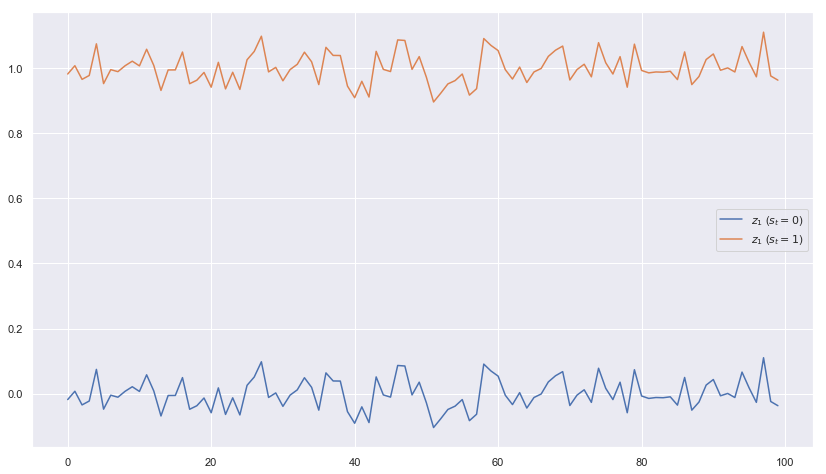

In [152]:
plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()

In [153]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

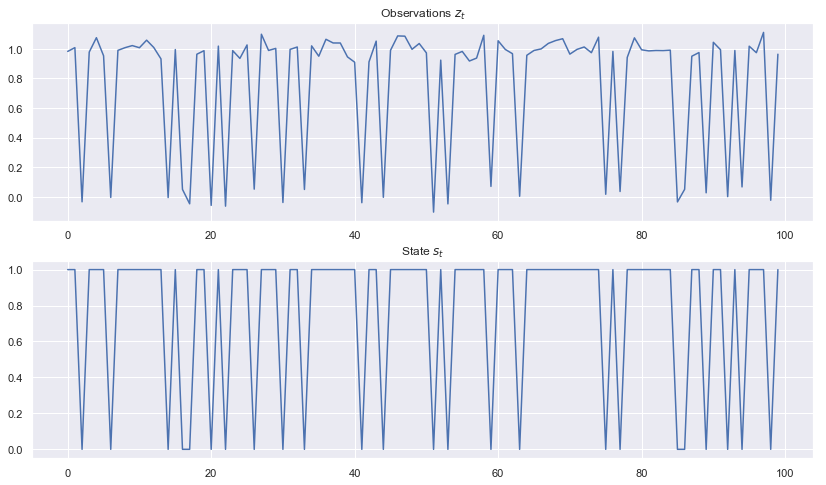

In [154]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

Это стационарный AR(1) процесс со средним $\dfrac{\alpha_0}{1-\beta}$ при $s_t=0$ и переключающийся на другой стационарный AR(1) процесс со средним $\dfrac{\alpha_0+\alpha_1}{1-\beta}$, когда $s_t$ переключается с 0 на 1.

- если $a_1 \ne 0$: два динамических паттерна в зависимости от значения переменной состояния $s_t$;
- в этом случае $z_t$ управляется двумя распределениями с разным средним;
- переменная $s_t$ отвечает за переключение между этими распределениями (режимами).

Только что показанный пример: $s_t \sim Bern(p),p=0.8$.

В этой модели $s_t$ не зависит от предыдущих и будущих реализаций, поэтому $z_t$ может сильно "прыгать" (часто переключаться между разными состояниями).

### Практика. Сгенерируйте модель с переключениями на основе двух моделей AR(1)

In [156]:
def make_ar2(a0, a1, a2, n):
    noise = np.random.normal(size=n)
    result = [a0 + noise[0], a0 + a1 * (a0 + noise[0]) + noise[1]]
    for i in range(2, n):
        result.append(a0 + a1*result[i - 1] + a2*result[i - 2] + noise[i])
    return np.array(result)


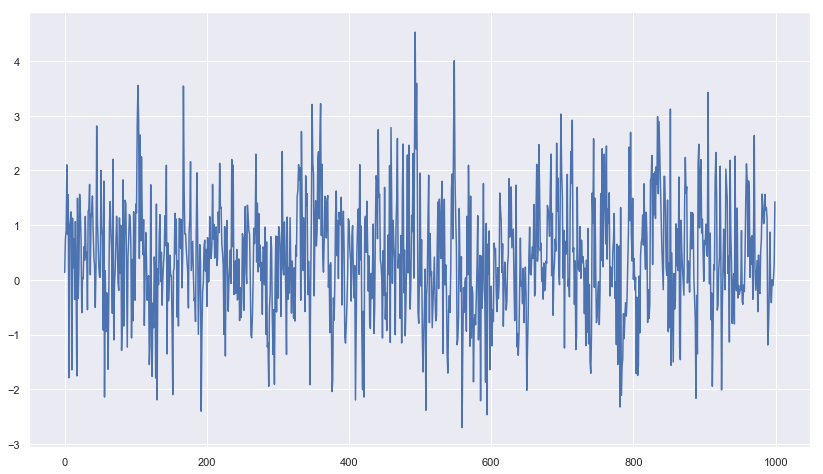

In [158]:
ar_1 = make_ar2(0.2, 0.2, 0.2, 1000)
plt.figure(figsize=(14,8))
plt.plot(ar_1)
plt.show()

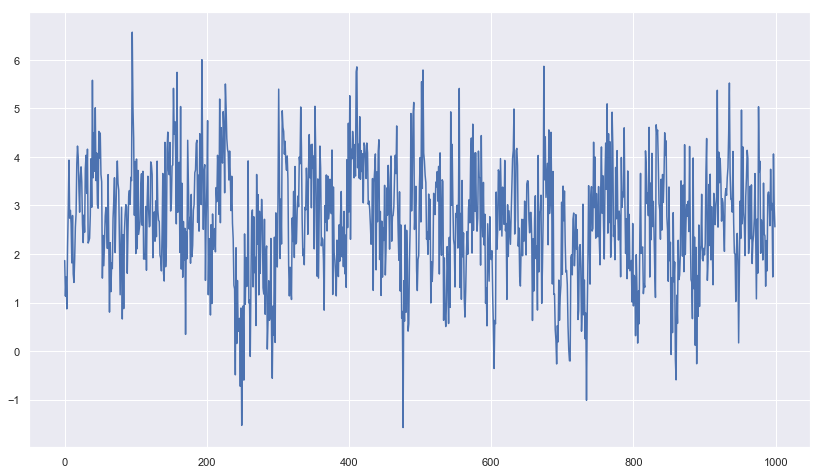

In [159]:
ar_2 = make_ar2(0.8, 0.3, 0.4, 1000)
plt.figure(figsize=(14,8))
plt.plot(ar_2)
plt.show()

In [160]:
s = np.random.binomial(n=1, p=0.5, size=1000)

In [162]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(ar_1[t])
    else:
        z.append(ar_2[t])

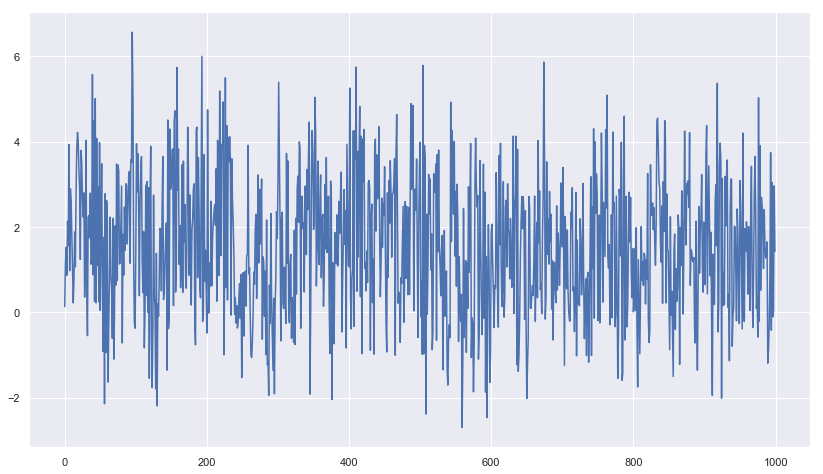

In [163]:
plt.figure(figsize=(14,8))
plt.plot(z)
plt.show()

## Что такое модель с марковским переключением?

Пусть, как раньше,

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1 согласно марковской цепи первого порядка:

$P=\begin{pmatrix} P(s_t=0|s_{t-1}=0) & P(s_t=1|s_{t-1}=0 \\ P(s_t=0|s_{t-1}=1) & P(s_t=1|s_{t-1}=1 \end{pmatrix} = \begin{pmatrix} p_{00} & p_{01} \\ p_{10} & p_{11} \end{pmatrix}$

где за $p_{ij},i,j∈\{0,1\}$ обозначена вероятность перехода в состояние $s_t=j$ из состояния $s_{i−1}=i$.

- Матрица перехода управляет случайным поведением переменной состояния и зависит только от двух параметров ($p00$
 и $p11$).
- Модель такого типа называют моделью с марковскими переключениями.
- Свойства $z_t$ определяются характеристиками распределения как $\epsilon_t$, так и переменной состояния $s_t$.
- В частности, марковская переменная состояния приводит к случайным и частым сменам режима, а вероятности перехода определяют персистентность каждого из режимов.

Важный факт: распределение наблюдений обусловлено ненаблюдаемой переменной состояния:
$Law(z_t)=Law(z_t|s_t)$

Например:
- $Law(z_t|s_t=0) = N(\dfrac{\alpha_0}{1-\beta}, \sigma_\epsilon^2)$
- $Law(z_t|s_t=1) = N(\dfrac{\alpha_0 + \alpha_1}{1-\beta}, \sigma_\epsilon^2)$

# Как сгенерировать траекторию модели с марковскими переключениями?

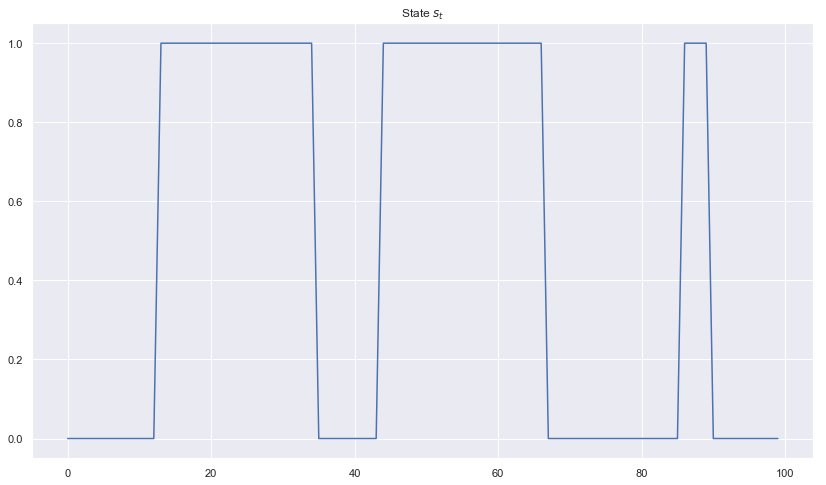

In [164]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

In [165]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

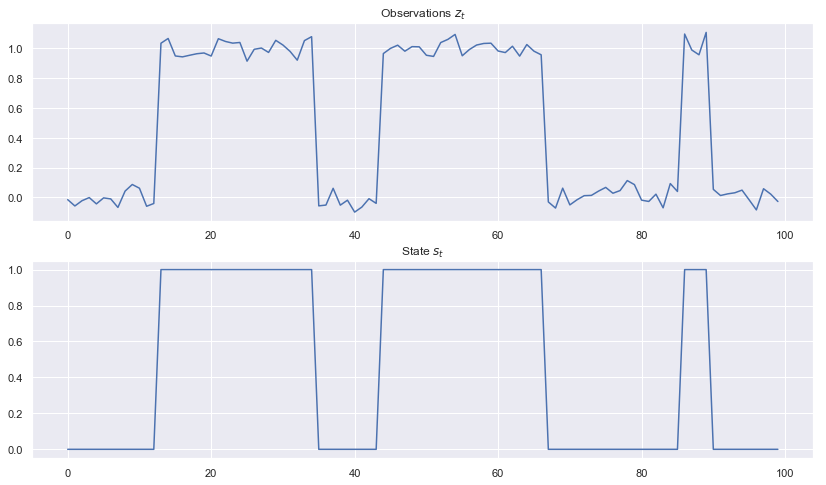

In [166]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

# Что такое скрытые марковские модели?

**Определение.** Скрытая марковская модель (первого порядка) - это вероятностная модель последовательности, которая состоит из набора наблюдаемых переменных $X={x_1,…,x_n}$, где $x_k \in R^d$, и набора латентных (или скрытых) 
переменных

$T={t_1,...,t_n}, t_k \in \{0,1\}^K, \sum \limits_{i=1}^K t_{ki} = 1$.

- латентные переменные являются бинарными и кодируют $K$ состояний: переменные состояния;
- значения наблюдаемого вектора $x_k$ в момент времени $k$ зависят только от скрытого состояния $t_k$;
- $t_k$, в свою очередь, зависит только от $t_{k−1}$.

Пусть в скрытой марковской модели $K$ состояний. Закодируем их состояния в момент времени $n$ бинарным вектором $t_n=(t_{n1},…,t_{nK})$ по правилу:

$t_{ij} = \begin{cases} 1, & \mbox{ система находится в состоянии j в момент времени i} \\ 0, & \mbox{иначе} \end{cases}$

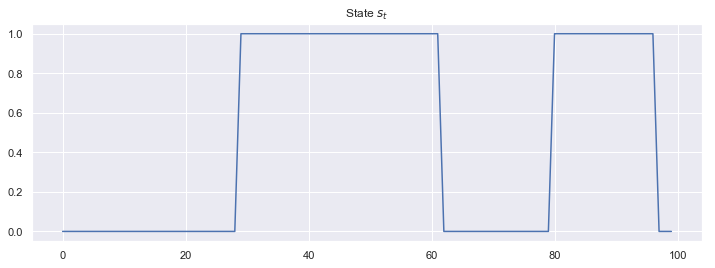

In [167]:
P = np.array([
    [0.95, 0.025, 0.025],
    [0.025, 0.95, 0.025],
    [0.025, 0.025, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(s)
_ = axs.set_title('State $s_t$')
plt.show()

In [168]:
np.array(s)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

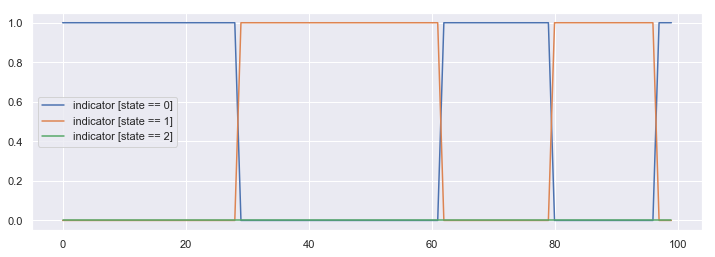

In [169]:
t = np.zeros((3, 100))
for i in range(3):
    t[i, :] = (np.array(s) == i).astype(int)
    
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
for i in range(3):
    _ = axs.plot(t[i, :], label='indicator [state == {}]'.format(i))
_ = axs.legend()

In [170]:
a, b = np.where(t)
assert np.all(np.array(a[np.argsort(b)]) == np.array(s))

Свойства такого формализма:

- в векторе $t_n$ может быть только один ненулевой элемент;
- предполагается, что система не может находиться в двух разных состояниях одновременно;
- распределение $t_n$ относительно $t_{n−1} -- p(t_n∣t_{n−1})$: матрица $A$, где $A_{ij}=p(t_{nj}=1∣t_{n−1,i}=1)$.

Стоит заметить, что $\sum \limits_{j=1}^K A_{ij}=1$. Следовательно, распределение можно записать следующим образом:

$p(t_n|t_{n-1}) = \prod\limits_{i=1}^K \prod\limits_{j=1}^K A_{ij}^{t_{n-1,i^{t_{nj}}}}$

- Начальное распределение $p(t1)$. Пусть $\pi_i=p(t_{1i}=1)$. Тогда

$p(t_1)=\prod\limits_{i=1}^K \pi_i^{t_{1i}}$.

- Обычно используются матрицы $A$ с преобладающими элементами на диагонали (более вероятно, что система не изменит своего состояния).
- Переменная $x_n$ зависит только от переменной состояния $t_n$: разумно рассматривать условное распределение $p(x_n∣t_n)$. Обычно предполагается, что оно известно с точностью до параметров $phi_k,k \in \{1,…,K\}$: то есть, если $t_{ni}=1$, то $p(x_n∣t_n)=p(x_n∣\phi_i)$.

$p(x_n∣t_n)=\prod\limits_{k=1}^K p(x_n∣\phi_k)^{t_{nk}}$.

Введённых параметров достаточно для полного описания скрытой марковской модели. Их собирают в набор параметров
$\Theta=(\pi,A,\phi)$, где $\pi=(\pi_1,…,\pi_K),\phi=(\phi1,…,\phi_K)$.


Основные задачи теории скрытых марковских процессов:
    
- **Обучение с учителем**. Пусть есть некоторая последовательность $X$, для которой известны латентные переменные $T$. По обучающей выборке нужно оценить набор параметров $\Theta$.
- **Сегментация**. Пусть известна последовательность наблюдаемых переменных $X$ и набор параметров $\Theta$. По ним нужно построить максимально правдоподобный набор латентных переменных $T$, то есть найти $argmax_T p(T∣X,\Theta)$.
- **Обучение без учителя**. Пусть известна последовательность наблюдаемых переменных $X$ и число состояний $K$. Нужно оценить набор параметров $\Theta$. Подзадача - **нахождение маргинального распределения**: найти $p(t_n∣X,\Theta)$.
- **Прогнозирование**. Пусть известна некоторая последовательность X длины N. Нужно оценить наблюдаемый вектор в момент времени $N+1$, то есть найти $p(x_{N+1}∣X)$.

# Как сгенерировать траекторию скрытой марковской модели?

In [171]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

No handles with labels found to put in legend.


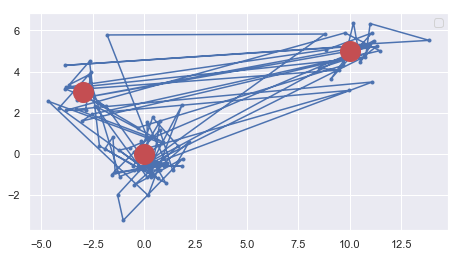

In [172]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

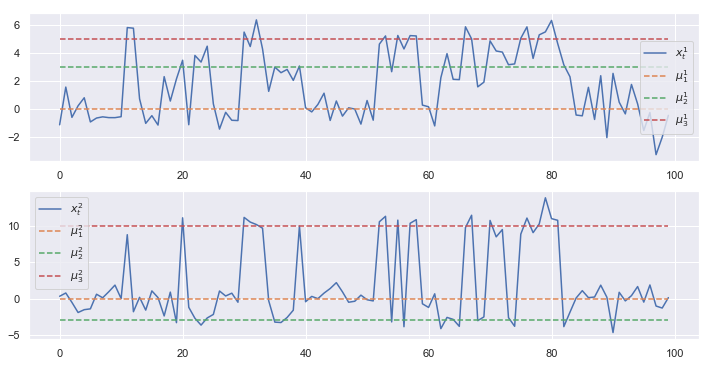

In [173]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

# Прогноз с использованием HMM

In [174]:
from hmmlearn.hmm import GaussianHMM

In [175]:
series = pd.read_csv("Series/daily-total-female-births-in-cal.csv")["Count"]

In [176]:
values = series.values.reshape(-1,1)

In [177]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932189
2 -1231.4145479769163
3 -1228.6376241958374
4 -1222.4806144371287
5 -1214.0854041790594
6 -1208.2775972401942
7 -1200.8324305909125
8 -1191.2120452545403
9 -1173.492223463473
10 -1159.822694963667
11 -1157.6990214654452
12 -1135.6802958963758
13 -1136.7101399039884


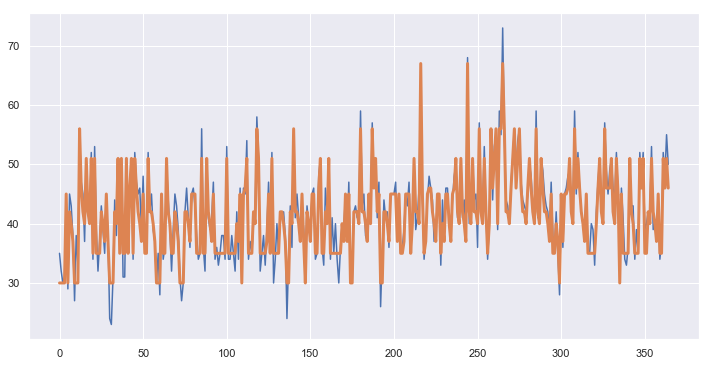

In [188]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [189]:
model.transmat_.shape

(10, 10)

Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.

## Практика. Спрогнозируйте ряд на 10 измерений вперед (через среднее каждой компоненты)

In [190]:
cur_value = labels[-1]
preds = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    preds.append(model.means_[cur_value])

In [191]:
new_series = np.concatenate((values, np.array(preds)))

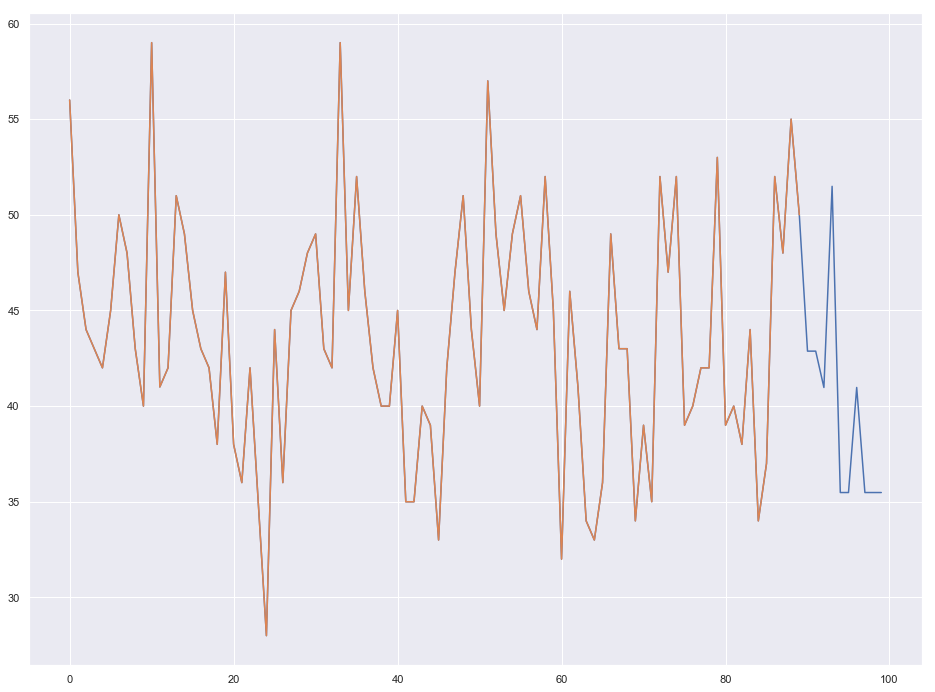

In [193]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()

In [194]:
cur_value = labels[-11]
preds = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    preds.append(model.means_[cur_value])

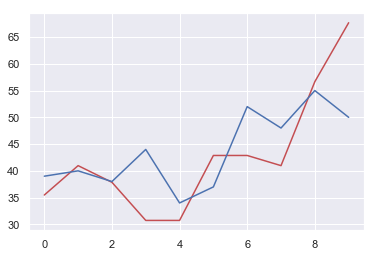

In [195]:
plt.plot(preds, 'r-')
plt.plot(values[-10:])
plt.show()

# Материалы

- http://quantile.ru/11/11-CK.pdf

# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.